# Resolvendo o Pêndulo Simples e Forçado.

* PET - Física UFRN
* Petiano: Gabriel Zuza
* Data: 05/2020



O Objetivo desse `Notebook` não é abordar de forma teórica as deduções e métodos envolvidos nos problemas, mas na prática, aplicar tais conceitos obtendo resultados concretos e representativos.

## Pendulo Simples

* Premissas inicias do sistema:
1. A massa do sistema é pontual no fim da haste;
2. A haste é inextensível e inflexível;
4. Não há forças de atrito externas (atrito com o ar por exemplo).

O movimento de um pêndulo simples é descrito a partir da segunda lei de Newton, chegando na Equação abaixo que é muitas vezes conhecida como "Equação de Mathieu":

$$ \frac{d^2\theta}{dt^2} = - \frac{ g \;sen\theta}{l} $$

Onde $\theta$ é o angulo entre a haste e a direção da força gravitacional, $g$ é o módulo da aceleração da gravidade local e $l$ é o comprimento da haste.

Importando Bibliotecas:


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Para esse problema, usaremos o método Runge-Kutta de 4ª ordem. Para aplicar esse 
método em equações diferenciais de segunda ordem é necessário criar uma 
vaiável auxiliar que chamaremos de $\phi$, de forma que:

$$\frac{d\theta}{dt} = \phi$$ 

$$ \frac{d\phi}{dt} = - \frac{ g \;sen\theta}{l} $$

Com isso, devemos criar uma função que receba 2 parâmetros, o primerio parâmetro será um vetor contendo os valores de $\theta$ e $\phi$, respectivamente, e o segundo parâmetro o tempo $t$ da iteração.

Perceba também que como $\phi$ é a derivada da posição angular em relação ao tempo, logo,  $\phi$ tem um sentido físico de velocidade angular.

Sabendo disso estamos prontos para implementar a EDO:

In [3]:
def f(r,t):
    theta = r[0]
    phi = r[1]
    dtheta_dt = phi
    dphi_dt = - (g/l)*np.sin(theta)
    return np.array([dtheta_dt,dphi_dt],float)

Definindo as condições iniciais da simulação:
1. Digamos que começe em $t = 0$ até $t = 20$ em $s$
2. Cosideraremos $g = 9.81$ e $l = 0.3$ em $m/s^2$ e $m$ respectivamente
3. Vamos começar a simulação com o pendulo parado a $90^o$ da posição de equilíbrio. (ou seja, $\phi =0 $ e $\theta = \pi/2$)

Criaremos também listas vazias para armazenas os valores de $t$, $\phi$, $\theta$ gerados na simulação. 

Implementando essas condições iniciais temos:

In [4]:
tempo_inicial = 0
tempo_final = 20
g,l = 9.81, 0.3
r = np.array([np.pi/2,0],float)

lista_theta,lista_phi,lista_t = [],[],[]

Partimos agora para aplicar o Runge-Kutta, definiremos $1000$ como número de passos inicialmente.

In [5]:
N = 10000
h = (tempo_final-tempo_inicial)/N
t = tempo_inicial 

while(t < tempo_final):
        lista_t.append(t)
        lista_theta.append(r[0])
        lista_phi.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+k1/2,t+h/2)
        k3 = h*f(r+k2/2,t+h/2)
        k4 = h*f(r+k3,t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)
        t += h

Plotando resultados:

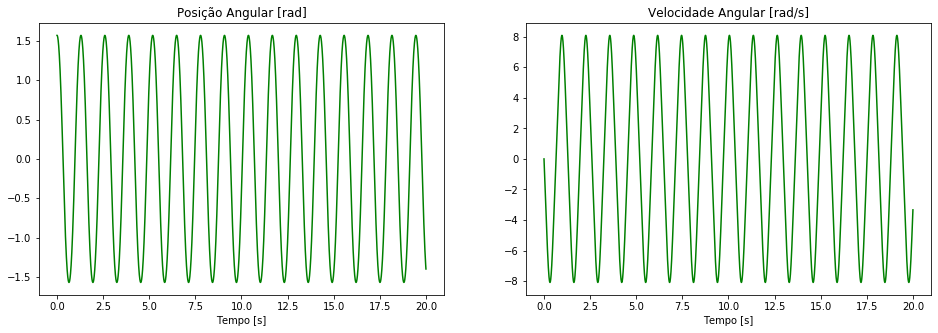

In [6]:
fig = plt.figure(figsize=(16,5))

plt.subplot(1,2,1)

plt.title("Posição Angular [rad]")

plt.xlabel("Tempo [s]")
plt.plot(lista_t,lista_theta,"g")

plt.subplot(1,2,2)
plt.title("Velocidade Angular [rad/s]")

plt.xlabel("Tempo [s]")
plt.plot(lista_t,lista_phi,"g")


plt.show()


## Pendulo Forçado

Para o caso de um Pêndulo Forçado usaremos as mesmas premissas inicias referentes ao sistema. Relembrando, temos:
1. A massa do sistema é pontual no fim da haste;
2. A haste é inextensível e inflexível;
4. Não há forças de atrito externas (atrito com o ar por exemplo).

Já a equação que decreve o problema é a mesma do pendulo simples com a adição de mais um termo referente a força externa, como representado abaixo:

$$ \frac{d^2\theta}{dt^2} = - \frac{ g \;sen\theta}{l} + k\;cos\;\theta \;sen (\zeta t) $$ 

Onde $k$ é uma constante que infere o módulo da força externa e $\zeta$ é uma constante de fase da força externa.

Implemtentando todas as informações descritas acima, temos:



Com isso definimos a variável auxiliarde $\phi$, de :

$$\frac{d\theta}{dt} = \phi  $$

 $$  \frac{d\phi}{dt} = - \frac{ g \;sen\theta}{l} + k\;cos\;\theta \;sen (\zeta t) $$

Implementado, temos:

In [7]:
def f(r,t):
    theta = r[0]
    phi = r[1]
    dtheta_dt = phi
    dphi_dt = - (g/l)*np.sin(theta) + k*np.cos(theta)*np.sin(zeta*t)
    return np.array([dtheta_dt,dphi_dt],float)

Usaremos as mesmas condições iniciais do exemplo do Pendulo Simples por razões comoarativas, relembrando:
1. Digamos que começe em $t = 0$ até $t = 20$ em $s$
2. Cosideraremos $g = 9.81$ e $l = 0.3$ em $m/s^2$ e $m$ respectivamente
3. Vamos começar a simulação com o pendulo parado a $90^o$ da posição de equilíbrio. (ou seja, $\phi =0 $ e $\theta = \pi/2$)

Além disso, para as constantes da força externas definiremos outra condição inicial:

4. Consideraremos $k = 5$ e  $\zeta = \pi$

Criaremos novamente listas vazias para armazenas os valores de $t$, $\phi$, $\theta$ gerados na simulação. 


In [8]:
tempo_inicial = 0
tempo_final = 20
g,l,k,zeta = 9.81, 0.3,5,np.pi
r = np.array([np.pi/2,0],float)

lista_theta_forcado,lista_phi_forcado,lista_t_forcado = [],[],[]

Resolvendo por Runge-Kutta:

In [9]:
N = 10000
h = (tempo_final-tempo_inicial)/N
t = tempo_inicial 

while(t < tempo_final):
        lista_t_forcado.append(t)
        lista_theta_forcado.append(r[0])
        lista_phi_forcado.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+k1/2,t+h/2)
        k3 = h*f(r+k2/2,t+h/2)
        k4 = h*f(r+k3,t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)
        t += h

Plotando Resulatdos:

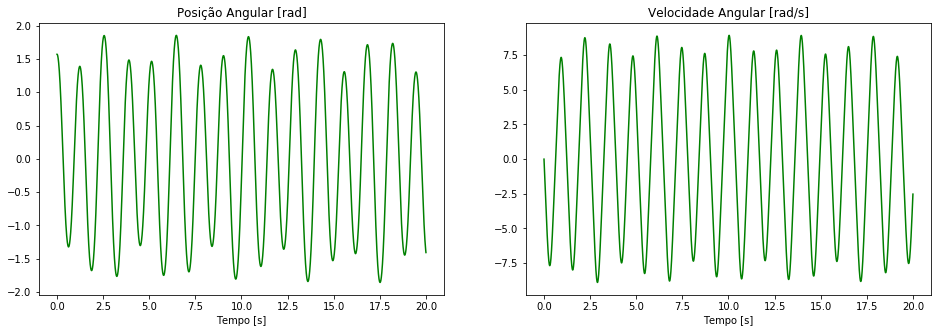

In [10]:
fig = plt.figure(figsize=(16,5))

plt.subplot(1,2,1)

plt.title("Posição Angular [rad]")

plt.xlabel("Tempo [s]")
plt.plot(lista_t_forcado,lista_theta_forcado,"g")


plt.subplot(1,2,2)
plt.title("Velocidade Angular [rad/s]")

plt.xlabel("Tempo [s]")
plt.plot(lista_t_forcado,lista_phi_forcado,"g")


plt.show()

Comparando o Pêndulo Simples e Forçado:


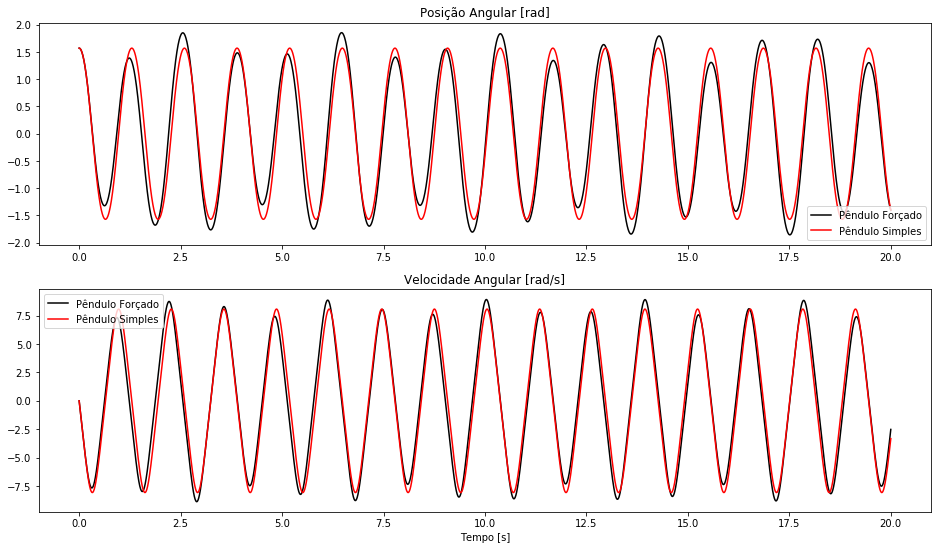

In [11]:
fig = plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
plt.title("Posição Angular [rad]")

plt.plot(lista_t_forcado,lista_theta_forcado,"k",label = "Pêndulo Forçado")
plt.plot(lista_t,lista_theta,"r",label = "Pêndulo Simples")

plt.legend()


plt.subplot(2,1,2)
plt.title("Velocidade Angular [rad/s]")

plt.plot(lista_t_forcado,lista_phi_forcado,"k",label = "Pêndulo Forçado")
plt.plot(lista_t,lista_phi,"r",label = "Pêndulo Simples")

plt.legend()
plt.xlabel("Tempo [s]")

plt.show()